In [59]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import csv
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [60]:
#df_train contains data as is
df_train = pd.read_csv('train_normalized.csv')

In [61]:
df_train['SalePrice'] = np.exp(df_train['SalePrice'])
df_train['SalePrice'] = df_train['SalePrice'].astype(np.int64, copy=False)

In [62]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,YearBuilt,YearRemodAdd,Foundation,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,GrLivArea,Functional,Fireplaces,GarageCars,PavedDrive,WoodDeckSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubclass_category,TotalBath,TotalPorchSF,TotalQual,BsmtTotalQual,HasWoodDeckSF,HasTotalPorchSF
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,731.002065,56.785960,37.130076,9.102220,1.996559,14.033035,20.488644,4.137646,2.941500,12.843772,2.902959,5.280110,1971.273916,1984.832072,4.264281,3.562973,3.010323,4.563661,436.575361,2.271163,46.108052,568.278734,1050.962147,4.145217,0.934618,4.869924,7.265175,7.841019,0.609085,1.768066,2.856848,2.450409,6.322780,2007.814866,7.002065,4.830007,180725.113558,25.602202,2.200275,3.102259,350.968341,12.756044,0.478321,0.686855
std,421.839747,42.228638,7.974322,0.496413,0.058581,5.735589,4.449987,1.425001,0.262468,6.680196,0.701885,1.543447,30.182126,20.651026,1.605456,0.676997,0.283676,2.071611,431.834897,0.867679,160.383167,442.106542,414.368705,0.960070,0.247284,0.500974,0.330381,0.669214,0.639581,0.745435,0.495312,2.592168,2.702108,1.330196,1.019437,0.888018,79413.158900,6.843291,0.769924,2.206110,70.493296,3.890741,0.499702,0.463933
min,1.000000,20.000000,10.000000,7.170120,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.811141,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,34900.000000,10.000000,1.000000,0.000000,83.000000,1.001040,0.000000,0.000000
25%,367.000000,20.000000,40.000000,8.927314,2.000000,10.000000,20.000000,3.000000,3.000000,7.000000,3.000000,5.000000,1954.000000,1967.000000,3.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,224.000000,795.000000,3.000000,1.000000,5.000000,7.028201,8.000000,0.000000,1.000000,3.000000,0.000000,5.000000,2007.000000,7.000000,5.000000,129899.000000,20.000000,2.000000,0.000000,306.000000,10.406486,0.000000,0.000000
50%,731.000000,50.000000,40.000000,9.155250,2.000000,10.000000,20.000000,5.000000,3.000000,13.000000,3.000000,5.000000,1973.000000,1994.000000,3.000000,4.000000,3.000000,5.000000,380.000000,2.000000,0.000000,480.000000,990.000000,5.000000,1.000000,5.000000,7.284821,8.000000,1.000000,2.000000,3.000000,0.000000,6.000000,2008.000000,7.000000,5.000000,163000.000000,30.000000,2.000000,3.871201,349.000000,12.149243,0.000000,1.000000
75%,1096.000000,70.000000,40.000000,9.357380,2.000000,20.000000,20.000000,5.000000,3.000000,17.000000,3.000000,7.000000,2000.000000,2004.000000,6.000000,4.000000,3.000000,7.000000,706.000000,2.000000,0.000000,808.000000,1293.000000,5.000000,1.000000,5.000000,7.480992,8.000000,1.000000,2.000000,3.000000,5.123964,8.000000,2009.000000,7.000000,5.000000,213999.000000,30.000000,2.500000,4.912655,383.000000,15.573298,1.000000,1.000000
max,1460.000000,190.000000,50.000000,11.653982,2.000000,40.000000,40.000000,5.000000,3.000000,25.000000,5.000000,8.000000,2010.000000,2010.000000,6.000000,5.000000,4.000000,7.000000,2188.000000,7.000000,1474.000000,2336.000000,3206.000000,5.000000,1.000000,5.000000,8.406485,8.000000,3.000000,4.000000,3.000000,6.753438,12.000000,2010.000000,10.000000,6.000000,755000.000000,30.000000,4.500000,6.934397,827.000000,26.761712,1.0

In [85]:
#df_train['Year'] = df_train[['YearBuilt', 'YearRemodAdd']].max(axis=1)

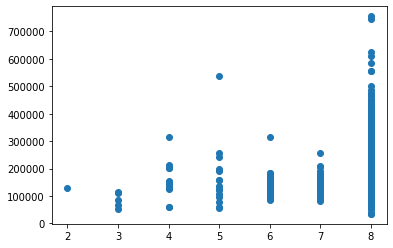

In [87]:
plt.scatter(x=(df_train['Functional']), y=(df_train['SalePrice']));

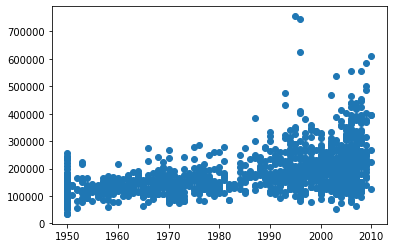

In [82]:
plt.scatter(x=(df_train['YearRemodAdd']), y=(df_train['SalePrice']));

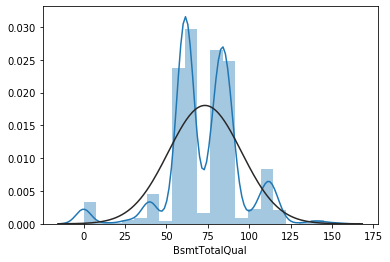

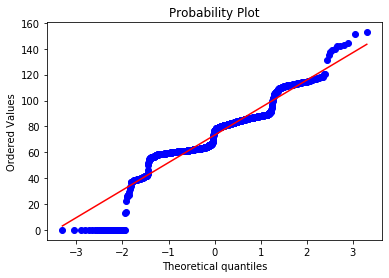

In [80]:
#histogram and normal probability plot
sns.distplot(df_train['BsmtTotalQual'], fit=norm, bins=20);
fig = plt.figure()
res = stats.probplot(df_train['BsmtTotalQual'], plot=plt)

In [ ]:
df_train['TotalQual'] = np.log(df_train['TotalQual'])

In [54]:
df_train['HasBsmtQualFin1'] = pd.Series(len(df_train['BsmtQualFin1']), index=df_train.index)
df_train['HasBsmtQualFin1'] = 0 
df_train.loc[df_train['BsmtQualFin1']>0,'HasBsmtQualFin1'] = 1
df_train.loc[df_train['HasBsmtQualFin1']==1,'BsmtQualFin1'] = np.log(df_train['BsmtQualFin1'])

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train['TotalQual'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalQual'], plot=plt)

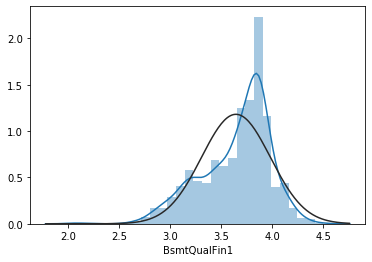

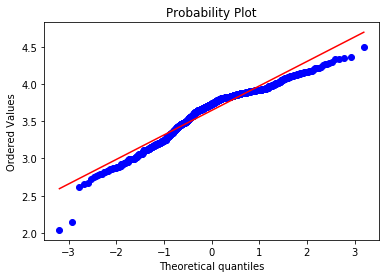

In [55]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['BsmtQualFin1']>0]['BsmtQualFin1'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['BsmtQualFin1']>0]['BsmtQualFin1'], plot=plt)